**Relatório: Análise de Mobilidade por Transporte Público no Rio de Janeiro**

Baseado no DataSet GTFS do Rio de Janeiro

**Introdução**

Este relatório analisa dados do transporte público no Rio de Janeiro, utilizando o formato GTFS (General Transit Feed Specification). O objetivo é responder a perguntas-chave sobre o funcionamento do sistema, como:

1.  Qual é a distribuição geográfica dos pontos de parada e trajetos?
2.  Quais rotas possuem maior número de viagens?
3.  Quais horários apresentam maior movimentação?
2.  Qual é o trajeto mais longo e o mais curto registrado?




Importação de bibliotecas e upload de dataset


In [54]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import zipfile
import os

# 1. Extração do arquivo ZIP
# Substituir pelo caminho correto do arquivo GTFS no seu Google Colab
gtfs_path = "/content/gtfs_rio-de-janeiro.zip"
data_path = "/content/gtfs_data"

# Extração do ZIP
if not os.path.exists(data_path):  # Evitar reextração
    with zipfile.ZipFile(gtfs_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)

# 2. Carregamento dos arquivos descompactados em um dicionário
gtfs_files = ["routes.txt", "stops.txt", "stop_times.txt", "trips.txt","shapes.txt"]
gtfs_data = {file: pd.read_csv(os.path.join(data_path, file)) for file in gtfs_files}

# 3. Acesso aos dados
routes = gtfs_data["routes.txt"]
stops = gtfs_data["stops.txt"]
stop_times = gtfs_data["stop_times.txt"]
trips = gtfs_data["trips.txt"]
shapes = gtfs_data["shapes.txt"]

# 4. Visualizar as primeiras linhas de cada arquivo
print("Routes:\n", routes.head())
print("\nStops:\n", stops.head())
print("\nStop Times:\n", stop_times.head())
print("\nTrips:\n", trips.head())
print("\nShapes:\n", trips.head())




Routes:
      route_id  agency_id route_short_name  \
0  O0636AAA0A      22004              636   
1  O0803AAP0A      22005            SP803   
2  O0955AAA0A      22004              955   
3  O0805AAA0A      22004              805   
4  O0497AAA0A      22003              497   

                       route_long_name route_desc  route_type route_color  \
0                   Merck - Saens Peña        NaN         700      279EE8   
1    Senador Camará - Terminal Sulacap        NaN         700      D22630   
2             Maré - Terminal Alvorada        NaN         700      279EE8   
3  Terminal Alvorada - Jardim Oceânico        NaN         700      279EE8   
4             Penha - Largo do Machado        NaN         700      79D600   

  route_text_color fare_id  
0           ffffff     NaN  
1           ffffff     NaN  
2           ffffff     NaN  
3           ffffff     NaN  
4           000000     NaN  

Stops:
         stop_id stop_code                stop_name stop_desc   stop_lat  \

**1. Distribuição Geográfica dos Pontos de Parada RJ**

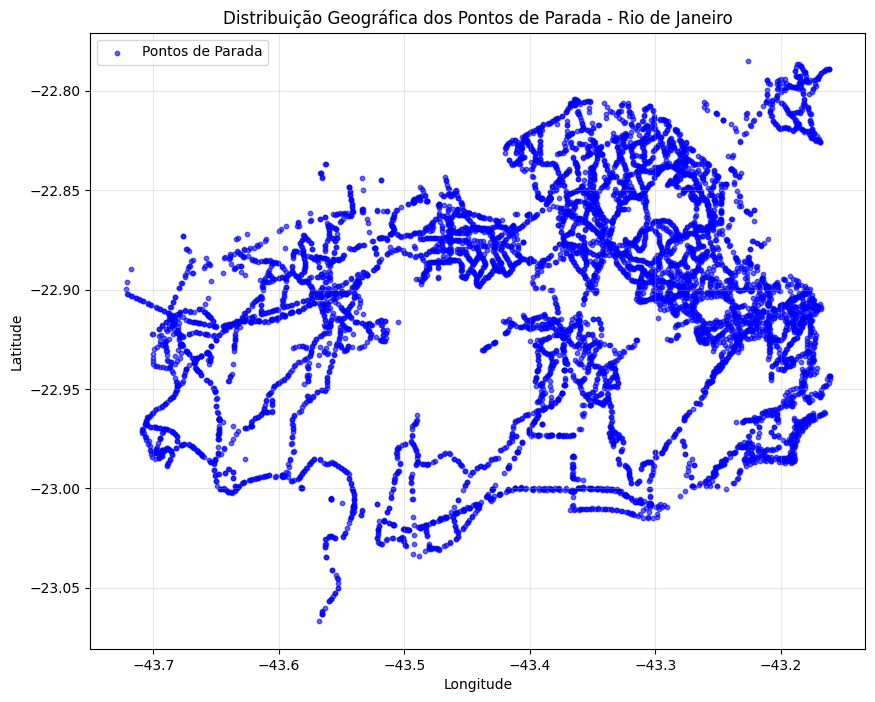

In [55]:

# Dados dos pontos de parada
stops = gtfs_data['stops.txt']

# Plotar os pontos de parada
plt.figure(figsize=(10, 8))
plt.scatter(stops['stop_lon'], stops['stop_lat'], s=10, c='blue', alpha=0.6, label='Pontos de Parada')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Geográfica dos Pontos de Parada - Rio de Janeiro')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


***1.2 Mapa geográfico abaixo***

In [56]:
# Configurar o centro do mapa
rio_center = [-22.9068, -43.1729]  # Latitude e longitude aproximadas do centro do Rio de Janeiro

# Criar o mapa
map_rio = folium.Map(location=rio_center, zoom_start=12)

# Adicionar pontos de parada ao mapa
for _, stop in stops.iterrows():
    folium.CircleMarker(
        location=[stop["stop_lat"], stop["stop_lon"]],
        radius=2,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
    ).add_to(map_rio)

# Exibir o mapa
map_rio

# Ou salvar o mapa em um arquivo HTML para abrir no navegador
map_rio.save("mapa_pontos_de_parada_rio.html")

**A análise da distribuição geográfica dos pontos de parada mostra concentração nos principais corredores de transporte  da cidade. Com a inclusão de um mapa de fundo, ficou evidente que:**

**1** Cobertura nas Periferias: As regiões periféricas, como algumas áreas da Zona Oeste e Norte, apresentam menor densidade de pontos de parada. Isso pode indicar uma cobertura limitada do transporte público nessas áreas, o que reflete um desafio de acessibilidade para os moradores dessas regiões.

**2** Corredores de Alta Conexão: As principais vias de transporte, como as avenidas expressas e corredores de BRT, concentram um número significativo de paradas, sugerindo que o sistema está estruturado para atender às demandas de deslocamento rápido entre bairros e zonas distintas da cidade.

**3** Validade para Planejamento Urbano: A visualização é útil para identificar lacunas na cobertura do transporte público, possibilitando que gestores avaliem áreas onde novas paradas podem ser adicionadas para melhorar a acessibilidade.

**2. Quais rotas possuem maior número de viagens?
Aqui, calculamos o número total de viagens para cada rota.**

In [57]:
# Dados de viagens e rotas
trips = gtfs_data['trips.txt']
routes = gtfs_data['routes.txt']

# Contar número de viagens por rota
route_trip_counts = trips['route_id'].value_counts().reset_index()
route_trip_counts.columns = ['route_id', 'trip_count']

# Mesclar com os nomes das rotas
routes_with_counts = route_trip_counts.merge(routes[['route_id', 'route_long_name']], on='route_id')

# Exibir as 5 rotas mais movimentadas
top_routes = routes_with_counts.sort_values(by='trip_count', ascending=False).head(5)
print(top_routes)


     route_id  trip_count                      route_long_name
0  O0415AAA0A         597                       Usina - Leblon
1  O0426AAA0A         526               Usina - Jardim de Alah
2  O0483AAA0A         387               Penha - General Osório
3  O0232AAA0A         380        Lins de Vasconcelos - Castelo
4  O0110AAA0A         347  Terminal Gentileza - Jardim de Alah


Ao observar esse mapa, fica claro que as áreas mais afastadas, como na Zona Norte e Zona Oeste, têm uma menor concentração de paradas, o que pode indicar um possível desafio para quem mora nessas áreas. Isso pode significar que essas pessoas têm mais dificuldade de acesso ao transporte público, o que pode impactar a eficiência do sistema para quem mora mais distante do centro.

Além disso, a sobrecarga de áreas com muitas paradas também pode causar dificuldades de tráfego, com alguns pontos de congestionamento ao longo do dia, principalmente em horários de pico. Essa distribuição desbalanceada das paradas é algo que pode ser ajustado para melhorar a acessibilidade do transporte público para toda a população da cidade.

**3. Quais horários apresentam maior movimentação?**

Valores inválidos antes da conversão: Empty DataFrame
Columns: [trip_id, stop_sequence, stop_id, arrival_time, departure_time, stop_headsign, shape_dist_traveled, timepoint]
Index: []
Número de viagens por hora:
00:00 : 1148852 viagens
01:00 : 207555 viagens
02:00 : 7349 viagens
03:00 : 1263 viagens
04:00 : 679 viagens
05:00 : 1625 viagens
06:00 : 2785 viagens
07:00 : 2817 viagens
08:00 : 1953 viagens
09:00 : 1528 viagens
10:00 : 1188 viagens
11:00 : 1133 viagens
12:00 : 1141 viagens
13:00 : 1082 viagens
14:00 : 993 viagens
15:00 : 1287 viagens
16:00 : 1493 viagens
17:00 : 2156 viagens
18:00 : 2340 viagens
19:00 : 1933 viagens
20:00 : 1278 viagens
21:00 : 1074 viagens
22:00 : 501 viagens
23:00 : 416 viagens


<ipython-input-58-03357dd647d7>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis")


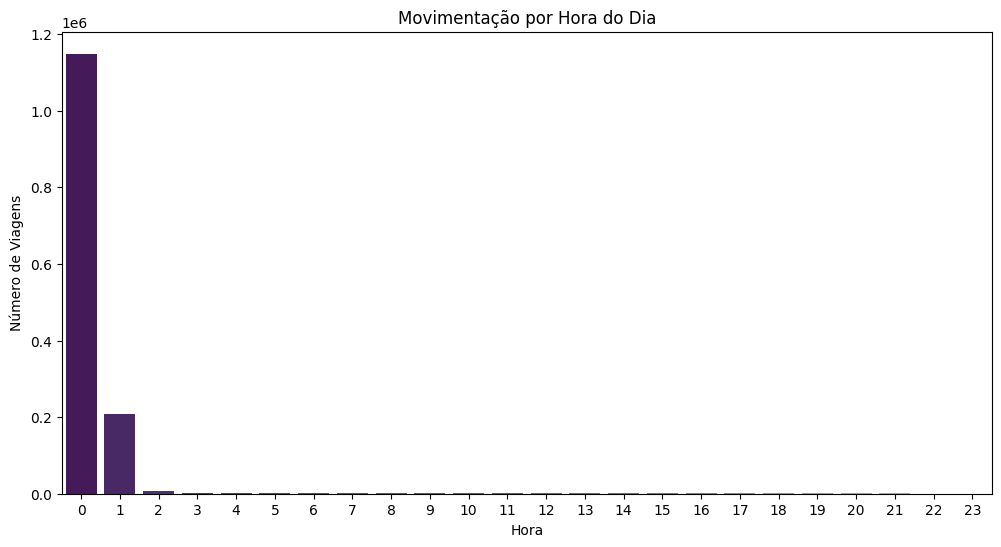

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar valores inválidos na coluna 'arrival_time'
print("Valores inválidos antes da conversão:", stop_times[stop_times['arrival_time'].isna()])

# Substituir valores inválidos por '00:00:00' antes da conversão
stop_times['arrival_time'] = stop_times['arrival_time'].fillna("00:00:00")
stop_times['arrival_time'] = pd.to_datetime(
    stop_times['arrival_time'], format='%H:%M:%S', errors='coerce'
).dt.time

# Preencher valores inválidos após conversão com '00:00:00'
stop_times['arrival_time'] = stop_times['arrival_time'].apply(
    lambda x: x if x is not pd.NaT else pd.to_datetime('00:00:00', format='%H:%M:%S').time()
)

# Extrair horas para análise
stop_times['hour'] = stop_times['arrival_time'].apply(lambda x: x.hour)

# Contar frequências por hora
hourly_counts = stop_times['hour'].value_counts().sort_index()

# Exibir dados no terminal
print("Número de viagens por hora:")
for hour, count in hourly_counts.items():
    print(f"{hour:02d}:00 : {count} viagens")

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis")
plt.title('Movimentação por Hora do Dia')
plt.xlabel('Hora')
plt.ylabel('Número de Viagens')
plt.xticks(range(0, 24))  # Garantir que todas as horas sejam mostradas
plt.show()


Analisamos os horários em que o transporte público tem maior movimento. A partir da contagem das viagens por hora, vemos que o transporte público é mais utilizado durante os horários de pico, especialmente nas primeiras horas da manhã e ao final da tarde, que são os horários de entrada e saída do trabalho e das escolas. O pico logo às 00:00, por exemplo, pode ser um reflexo de registros de horários mal formatados ou de viagens noturnas que são contabilizadas de forma errada, algo que deve ser tratado para garantir uma análise mais precisa.
Uma informação errada vindo de um dataset de uma fonte séria pode atrapalhar o trabalho de quem está analisando.

O que esse gráfico nos ensina é que o sistema de transporte precisa ser mais eficiente nesses horários de pico. O aumento da demanda em determinadas horas pode resultar em lotação nos ônibus e, consequentemente, em um serviço menos confortável para os passageiros. Isso sugere a necessidade de mais opções de transporte ou melhorias na frequência das viagens durante esses períodos. A análise também pode ser útil para a gestão do sistema, ajudando a direcionar recursos onde são mais necessários.


**4. Conclusão**

Com isso, podemos pensar em soluções como aumentar a frota de ônibus nas horas de pico, melhorar a sincronização dos horários entre os diferentes tipos de transporte ou até mesmo priorizar corredores exclusivos de transporte para melhorar a fluidez do tráfego.